In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.tree import DecisionTreeClassifier, _tree, export_graphviz, plot_tree, export_text
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from graphviz import Digraph
import re
from graphviz import Source
from Rules import *

In [2]:
# Load data
df = sns.load_dataset('titanic')

# Select variables
df = df[['class', 'sex', 'age', 'fare', 'survived']].dropna()

# Encode ‘class’ as ordinal
ordinal_encoder = OrdinalEncoder(categories=[['First', 'Second', 'Third']])
df['class'] = ordinal_encoder.fit_transform(df[['class']])

# Encoding ‘sex’ using Label Encoding
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])

# Prepare variables and target
X = df[['sex', 'class', 'age', 'fare']].values
feature_names = ['sex', 'class', 'age', 'fare']
y = df['survived']

# Category mapping dictionary
categorical_mappings = {
    'sex': {0: 'female', 1: 'male'}
}

# Training the decision tree
clf = DecisionTreeClassifier(max_depth=3, criterion='entropy', random_state=42)
clf.fit(X, y)

rules_sklearn = export_text(clf, feature_names=feature_names)

In [3]:
print(rules_sklearn)

|--- sex <= 0.50
|   |--- class <= 1.50
|   |   |--- fare <= 28.86
|   |   |   |--- class: 1
|   |   |--- fare >  28.86
|   |   |   |--- class: 1
|   |--- class >  1.50
|   |   |--- fare <= 20.80
|   |   |   |--- class: 1
|   |   |--- fare >  20.80
|   |   |   |--- class: 0
|--- sex >  0.50
|   |--- class <= 0.50
|   |   |--- age <= 53.00
|   |   |   |--- class: 0
|   |   |--- age >  53.00
|   |   |   |--- class: 0
|   |--- class >  0.50
|   |   |--- age <= 9.50
|   |   |   |--- class: 1
|   |   |--- age >  9.50
|   |   |   |--- class: 0



In [4]:
# Generate the rules from the tree
rules = get_rules(clf, feature_names, ['Not Survived', 'Survived'], ordinal_encoders={'class': ordinal_encoder}, categorical_mappings=categorical_mappings, X=X)

# Visualize the rules from the tree
for rule in rules:
    print(rule)

(sex == 'male') AND (class = First OR Second OR Third) AND (fare <= 28.86) -> Clase: Survived (n=[Not Survived: 7, Survived: 62], 9.7%)
(sex == 'male') AND (class = First OR Second OR Third) AND (fare > 28.86) -> Clase: Survived (n=[Not Survived: 2, Survived: 88], 12.6%)
(sex == 'male') AND (class = Third) AND (fare <= 20.80) -> Clase: Survived (n=[Not Survived: 35, Survived: 44], 11.1%)
(sex == 'male') AND (class = Third) AND (fare > 20.80) -> Clase: Not Survived (n=[Not Survived: 20, Survived: 3], 3.2%)
(sex == 'female') AND (class = First OR Second) AND (age <= 53.00) -> Clase: Not Survived (n=[Not Survived: 42, Survived: 37], 11.1%)
(sex == 'female') AND (class = First OR Second) AND (age > 53.00) -> Clase: Not Survived (n=[Not Survived: 19, Survived: 3], 3.1%)
(sex == 'female') AND (class = Second OR Third) AND (age <= 9.50) -> Clase: Survived (n=[Not Survived: 13, Survived: 17], 4.2%)
(sex == 'female') AND (class = Second OR Third) AND (age > 9.50) -> Clase: Not Survived (n=[Not 

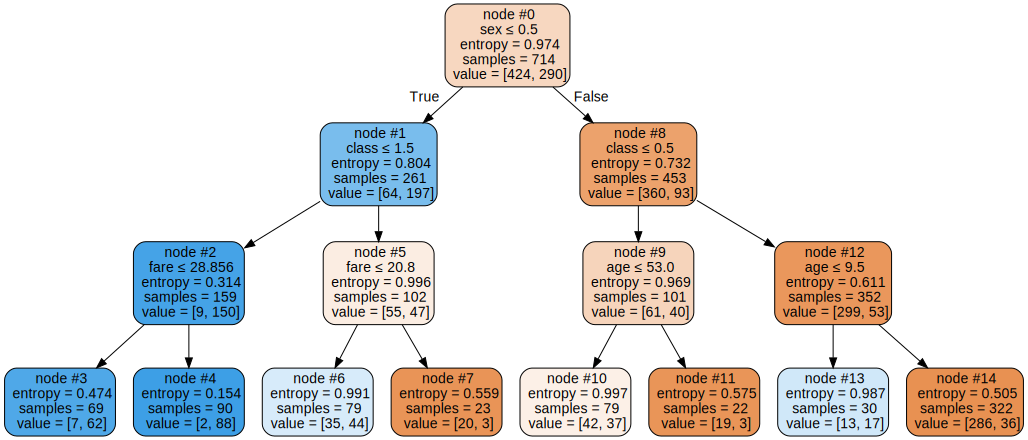

In [5]:
display(Source(export_graphviz(clf, out_file=None,
                                feature_names=feature_names,
                                #class_names=cluster_names,
                                filled=True, rounded=True,
                                special_characters=True,
                                impurity=True,
                                leaves_parallel=True,
                                rotate=False,
                                node_ids=True)))

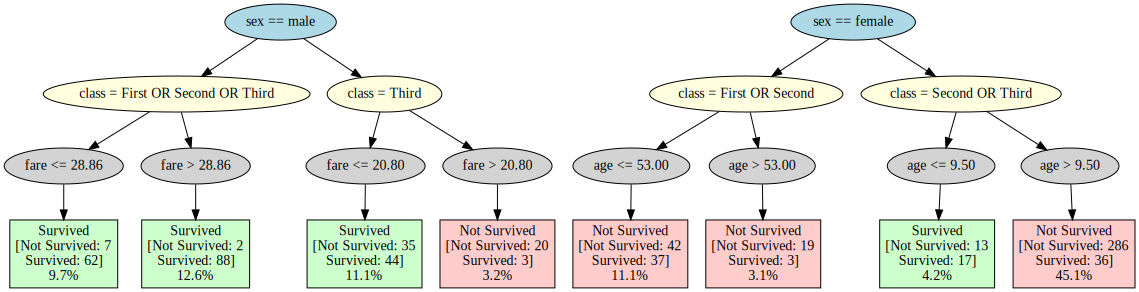

In [6]:
# Create the chart based on the generated rules
dot = draw_combined_tree(rules)
#dot.render('optimized_decision_tree', format='png')  # Save the graphic in PNG format
dot